IMDB : Internet Movie Database 예제

본 dataset은 calss가 0, 1 (긍정, 부정)이라 one hot incoding 불필요



In [3]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
print(x_train[0])

# 데이터 전처리
# 데이터 크기 100으로 맞춘다.
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)


/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000, 100))   # 입력 5000, 출력 100
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation='relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()   # model에 대한 요약

# Conv1D()는 1차원 컨볼루션이다.
# Conv1D(사용할 커널 개수, 커널의 행/열 크기, padding(?), 활성화 함수, 건너는 칸 개수)
# MaxPooling1D()도 1차원 맥스풀링이다.
# MaxPooling1D(pool_size = 칸을 줄일 배수)

# CNN 부분을 다시 참고하자

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

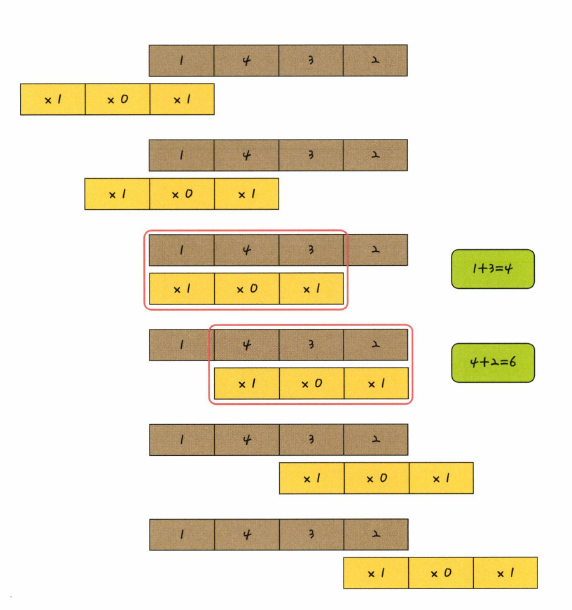

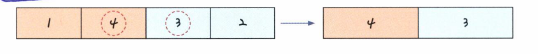

노란색 상자가 커널, 초록색 상자가 커널에 의해 만들어진 컨볼루션 layer

아래 사진은 maxpooling을 표현한 것이다.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4540 - accuracy: 0.7690 - val_loss: 0.3411 - val_accuracy: 0.8514
Epoch 2/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2917 - accuracy: 0.8765 - val_loss: 0.3251 - val_accuracy: 0.8568
Epoch 3/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2487 - accuracy: 0.9006 - val_loss: 0.3527 - val_accuracy: 0.8496
Epoch 4/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.2123 - accuracy: 0.9181 - val_loss: 0.3617 - val_accuracy: 0.8547
Epoch 5/5
25000/25000 [==============================] - 8s 322us/step

 Test Accuracy: 0.8485


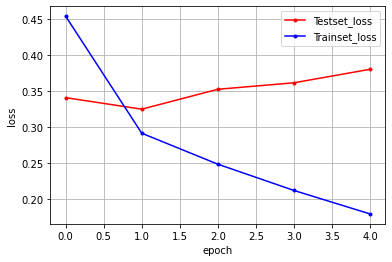

In [6]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
